In [1]:
import numpy as np # Computing
import pandas as pd # CSV
import random
import matplotlib.pyplot as plt # Charts
import seaborn as sns
sns.set_palette('husl')

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


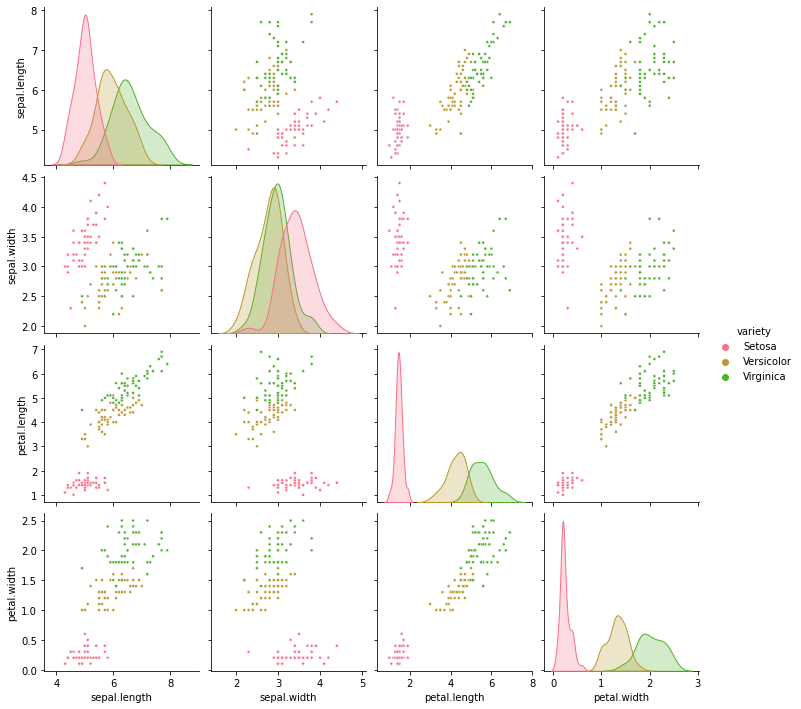

In [6]:
g = sns.pairplot(iris,hue='variety', markers='.')

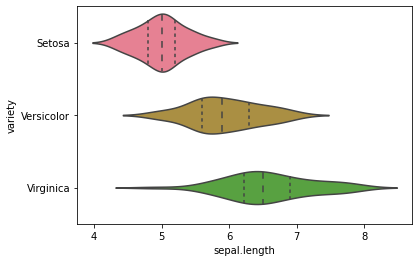

In [7]:
g = sns.violinplot(y='variety',x='sepal.length',data=iris, inner='quartile')

In [9]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j = random.randint(0,i)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
        return x

    @staticmethod
    def split_set(x):
        k = int(len(x)*0.7)
        train = x[:k]
        val = x[k:]
        return train, val

    @staticmethod
    def normalize(x):
        result = x.copy()
        val = result.select_dtypes(exclude="object")
        columns = val.columns.tolist()
        for c in columns:
            current_set = result.loc[:, c]
            maximum, minimum = max(current_set), min(current_set)
            for r in range(0,len(result),1):
                value = (result.at[r, c] - minimum) / (maximum - minimum)
                result.at[r, c] = value
        return result
        

In [10]:
class KNN:
    @staticmethod
    def minkowski_metric(v1,v2,m):
        distance = 0
        for i in range(len(v1)-1):
            distance+=(abs(v1[i]-v2[i])*m)
        distance = distance **(1/m)
        return distance
    @staticmethod
    def clustering(sample, x, k):
        distances = []
        classes = {'Setosa': 0, 'Virginica': 0, 'Versicolor': 0}
        for i in x.index:
            distances.append([KNN.minkowski_metric(sample, x.iloc[i], 2), x.iloc[i].variety])
            
        distances = sorted(distances)
                            
        for i in range(k):
            classes[distances[i][1]]+=1

        return max(classes, key=classes.get)
        

In [11]:
for k in range(2,6):
    X, Y = DataProcessing.split_set(DataProcessing.shuffle(iris))
    correct = 0

    for sample in Y.iloc:
        
        model_guess = KNN.clustering(sample, X, k)

        if model_guess == sample.variety:
            correct += 1
        
    accuracy = correct/len(Y)*100
    print("For k = {} | Score: {} % ({} correct)".format(k, round(accuracy,3), correct))

For k = 2 | Score: 95.556 % (43 correct)
For k = 3 | Score: 95.556 % (43 correct)
For k = 4 | Score: 97.778 % (44 correct)
For k = 5 | Score: 95.556 % (43 correct)
